In [2]:
import numpy as np
import prolif as plf
import MDAnalysis as mda

In [62]:
#bead3 = mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.protonly.tpr', 
#                       '../confout_files/measure_per_bead/influx_BFRU_gate_CV.bead_2.string.pdb')

#bead7 = mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.protonly.tpr', 
#                       '../confout_files/measure_per_bead/influx_BFRU_gate_CV.bead_7.string.pdb')

#bead11 = mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.protonly.tpr', 
#                       '../confout_files/measure_per_bead/influx_BFRU_gate_CV.bead_12.string.pdb')

bead_histo_test = mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.protonly.tpr', 
                               '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/BFRU_transition_occ/FES_grid_all.protonly.xtc')

In [63]:
test_sim = bead_histo_test

In [64]:
lig = test_sim.atoms.select_atoms("index 7513 7514") #resname BFRU
prot = test_sim.atoms.select_atoms("protein")

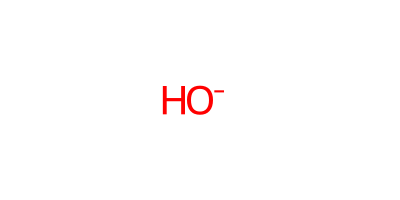

In [65]:
from rdkit import Chem
from rdkit.Chem import Draw
# create a molecule from the MDAnalysis selection
lmol = plf.Molecule.from_mda(lig)
# cleanup before drawing
mol = Chem.RemoveHs(lmol)
mol.RemoveAllConformers()
Draw.MolToImage(mol, size=(400,200))

In [66]:
fp = plf.Fingerprint(interactions=['Hydrophobic', 'HBDonor', 'HBAcceptor'])
skip_frames = 1
fp.run(test_sim.trajectory[::skip_frames], lig, prot)

  0%|          | 0/1022 [00:00<?, ?it/s]

<prolif.fingerprint.Fingerprint: 3 interactions: ['Hydrophobic', 'HBDonor', 'HBAcceptor'] at 0x7f96254a5ca0>

In [68]:
df = fp.to_dataframe()
df = df.droplevel("ligand" , axis = 1) # we only have 1 ligand residue so no need to separate into levels

/home/semccomas/anaconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/semccomas/anaconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/semccomas/anaconda3/envs/prolif/lib/python3.9/site-packages/seaborn/categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)
/home/s

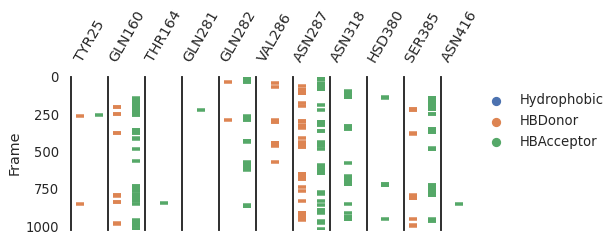

In [69]:
import seaborn as sns
import pandas as pd

# reorganize data
data = df.reset_index()
data = pd.melt(data, id_vars=["Frame"], var_name=["residue","interaction"])
data = data[data["value"] != False]
data.reset_index(inplace=True, drop=True)

# plot
sns.set_theme(font_scale=.8, style="white", context="talk")
g = sns.catplot(
    data=data, x="interaction", y="Frame", hue="interaction", col="residue",
    hue_order=["Hydrophobic", "HBDonor", "HBAcceptor"],
    height=3, aspect=0.2, jitter=0, sharex=False, marker="_", s=8, linewidth=3.5,
)
g.set_titles("{col_name}")
g.set(xticks=[], ylim=(-.5, data.Frame.max()+1))
g.set_xticklabels([])
g.set_xlabels("")
g.fig.subplots_adjust(wspace=0)
g.add_legend()
g.despine(bottom=True)
for ax in g.axes.flat:
    ax.invert_yaxis()
    ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")

I am thinking that scoring would actually not be best with fingerprints, but with just calculating minimum distance to a single binding site residue for now. 

We do each hydroxyl group on its own to try to stop the bouncing effect that we see with the sugar